# Import libraries

In [1]:
! pip install matching

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import wilcoxon

path="/content/drive/MyDrive/ds_portfolio/mechanism_design/data"

import sys
sys.path.append(path+'/../src')
import deferred_acceptance_algorithm
from deferred_acceptance_algorithm import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = pd.read_pickle(path+"/03_primary/mastertable.pickle")

# Show the experimental process

In [3]:
df.query("pref_alone == 4")[["pref_alone", "experiment_id", "total_utils_proposers", "total_utils_reviewers"]]

,pref_alone,experiment_id,total_utils_proposers,total_utils_reviewers
700,4,1,83,80
701,4,2,83,81
702,4,3,81,80
703,4,4,81,81
704,4,5,84,83
...,...,...,...,...
795,4,96,82,85
796,4,97,83,84
797,4,98,86,84
798,4,99,82,83


# Evaluate results

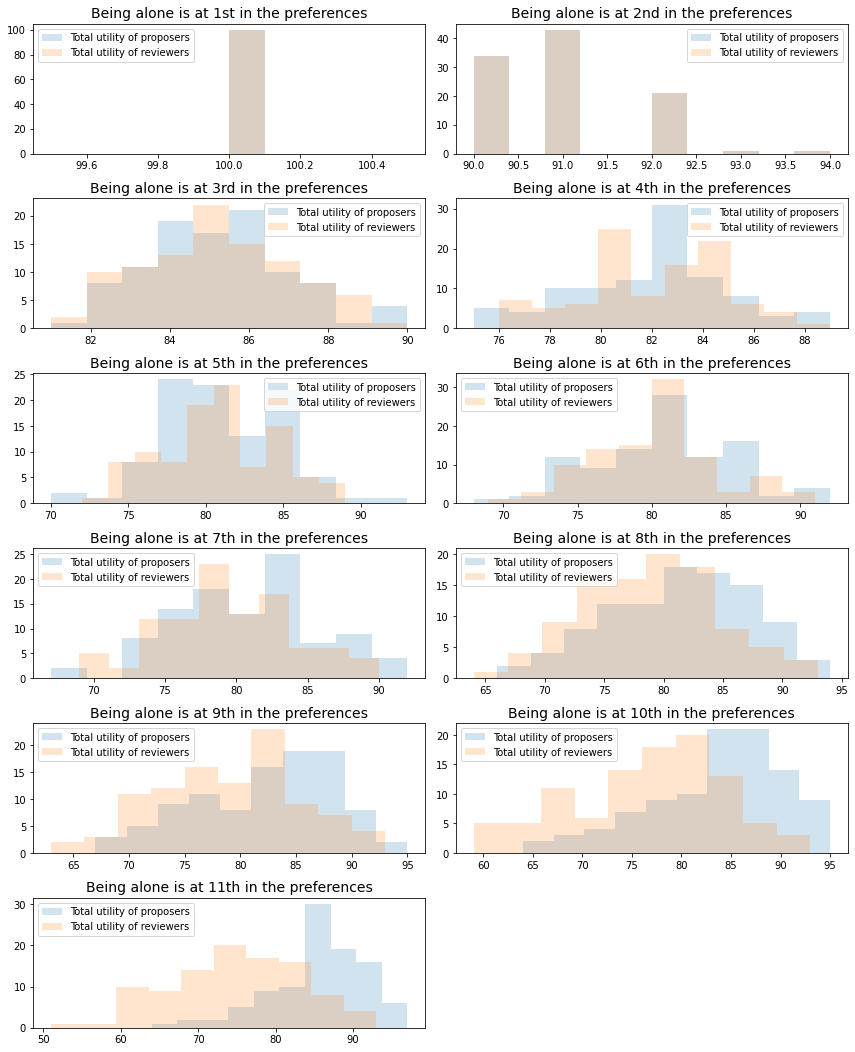

In [4]:
fig, ax = plt.subplots(6, 2, figsize=(12,16))
fig.delaxes(ax[5, 1]) 

ax[0, 0].set_title('Being alone is at 1st in the preferences', size=14)
ax[0, 0].hist(df[df.pref_alone==1]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[0, 0].hist(df[df.pref_alone==1]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[0, 0].legend()

ax[0, 1].set_title('Being alone is at 2nd in the preferences', size=14)
ax[0, 1].hist(df[df.pref_alone==2]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[0, 1].hist(df[df.pref_alone==2]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[0, 1].legend()

ax[1, 0].set_title('Being alone is at 3rd in the preferences', size=14)
ax[1, 0].hist(df[df.pref_alone==3]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[1, 0].hist(df[df.pref_alone==3]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[1, 0].legend()

ax[1, 1].set_title('Being alone is at 4th in the preferences', size=14)
ax[1, 1].hist(df[df.pref_alone==4]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[1, 1].hist(df[df.pref_alone==4]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[1, 1].legend()

ax[2, 0].set_title('Being alone is at 5th in the preferences', size=14)
ax[2, 0].hist(df[df.pref_alone==5]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[2, 0].hist(df[df.pref_alone==5]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[2, 0].legend()

ax[2, 1].set_title('Being alone is at 6th in the preferences', size=14)
ax[2, 1].hist(df[df.pref_alone==6]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[2, 1].hist(df[df.pref_alone==6]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[2, 1].legend()

ax[3, 0].set_title('Being alone is at 7th in the preferences', size=14)
ax[3, 0].hist(df[df.pref_alone==7]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[3, 0].hist(df[df.pref_alone==7]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[3, 0].legend()

ax[3, 1].set_title('Being alone is at 8th in the preferences', size=14)
ax[3, 1].hist(df[df.pref_alone==8]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[3, 1].hist(df[df.pref_alone==8]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[3, 1].legend()

ax[4, 0].set_title('Being alone is at 9th in the preferences', size=14)
ax[4, 0].hist(df[df.pref_alone==9]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[4, 0].hist(df[df.pref_alone==9]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[4, 0].legend()

ax[4, 1].set_title('Being alone is at 10th in the preferences', size=14)
ax[4, 1].hist(df[df.pref_alone==10]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[4, 1].hist(df[df.pref_alone==10]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[4, 1].legend()

ax[5, 0].set_title('Being alone is at 11th in the preferences', size=14)
ax[5, 0].hist(df[df.pref_alone==11]["total_utils_proposers"], alpha=0.2, label="Total utility of proposers")
ax[5, 0].hist(df[df.pref_alone==11]["total_utils_reviewers"], alpha=0.2, label="Total utility of reviewers")
ax[5, 0].legend()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

In [5]:
for i in range(1,12):
    print("Outside option is put at: ", i)
    try:
        d=[list1_i-list2_i for list1_i, list2_i in zip(df[df.pref_alone==i]["total_utils_proposers"], df[df.pref_alone==i]["total_utils_reviewers"])]
        w, p = wilcoxon(d, alternative='greater')
        if p >= 0.05:
            print(f"statistic: {w}, p-value: {p}, We cannot reject H0.")
        if p < 0.05:
            print(f"statistic: {w}, p-value: {p}, We can reject H0.")
    except: 
        pass

Outside option is put at:  1
Outside option is put at:  2
Outside option is put at:  3
statistic: 1381.0, p-value: 0.5144047852314233, We cannot reject H0.
Outside option is put at:  4
statistic: 1755.5, p-value: 0.8019788561423362, We cannot reject H0.
Outside option is put at:  5
statistic: 2367.0, p-value: 0.3054430610861146, We cannot reject H0.
Outside option is put at:  6
statistic: 2655.5, p-value: 0.15731037739641235, We cannot reject H0.
Outside option is put at:  7
statistic: 2491.5, p-value: 0.0571645091647876, We cannot reject H0.
Outside option is put at:  8
statistic: 2895.0, p-value: 0.011166925149153609, We can reject H0.
Outside option is put at:  9
statistic: 3385.0, p-value: 0.00033471079070725504, We can reject H0.
Outside option is put at:  10
statistic: 3826.5, p-value: 3.410373986984538e-07, We can reject H0.
Outside option is put at:  11
statistic: 4298.0, p-value: 1.5977832417941895e-11, We can reject H0.
